
<h1 style="background: linear-gradient(to right, #49A, #0FB); color: white; padding: 20px;">Program 10 Implementation: Bayesian network</h1>

<ol start="10">
    <li>Implement the non-parametric Locally Weighted Regression algorithm in order 
to fit data points. Select appropriate data set for your experiment and draw graphs   </li>
</ol>



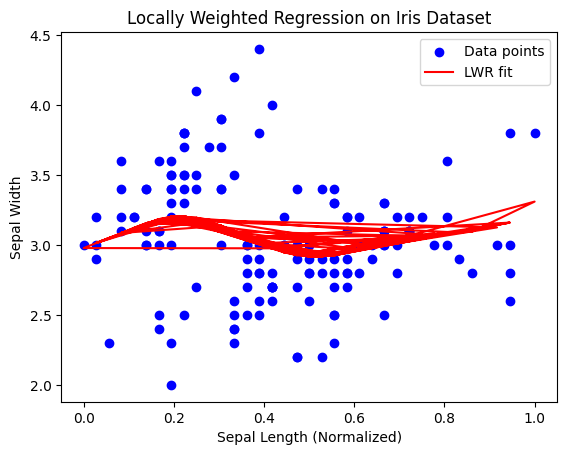

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data[:, 0].reshape(-1, 1)  # Sepal length as feature
y = iris.data[:, 1]  # Sepal width as target
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Locally Weighted Regression implementation
def kernel(point, x, tau):
    return np.exp(-np.sum((x - point) ** 2, axis=1) / (2 * tau ** 2))

def lwr(X, y, tau):
    y_pred = []
    for point in X:
        weights = kernel(point, X, tau)
        W = np.diag(weights)
        theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        y_pred.append(point @ theta)
    return np.array(y_pred)

# Add bias term
X_b = np.hstack((np.ones_like(X), X))

# Fit LWR with a chosen bandwidth
bandwidth = 0.1
y_pred = lwr(X_b, y, bandwidth)

# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='LWR fit')
plt.xlabel('Sepal Length (Normalized)')
plt.ylabel('Sepal Width')
plt.title('Locally Weighted Regression on Iris Dataset')
plt.legend()
plt.show()